# Simple implementation of an evolutionary algorithm

## Function being maximised is $sin(sqrt(x^2 + y^2))$



In [102]:
import random
import math
import matplotlib.pyplot as plt

# 1. Function to generate population

In [105]:
def gen_population(size, x_limits, y_limits):
    x_lower_lim, x_upper_lim= x_limits
    y_lower_lim, y_upper_lim= y_limits

    population = []
    
    #Individual = [x,y,fitness]
    
    for i in range(size):
        individual = [
            random.uniform(x_lower_lim, x_upper_lim), random.uniform(y_lower_lim, y_upper_lim), 0
        ]
        individual[2] = fitness(individual)
        population.append(individual)

    return population

# 2. Fitness Function  

In [106]:
#Fitness function

def fitness(candidate_solution):
    x = candidate_solution[0]
    y = candidate_solution[1]
    return math.sin(math.sqrt(x ** 2 + y ** 2))

# 3. Roulette wheel selection

In [90]:
def fitness_proportionate_selection(population):
    offset = 0
    fit_sum = 0
    
    
    #Check if there is any negative fitness
    lowest_fitness = sorted(population, key=lambda x: x[2])[0][2]    
    
    
    if lowest_fitness < 0:        
        offset = -lowest_fitness       
        
        for individual in population:
            fit_sum += individual[2] + offset
    else:
        for individual in population:
            fit_sum += individual[2]
    
    
    # Draw a random number for uniform probability distribution [0, 1)    
    draw = random.uniform(0, 1)

    accumulated = 0
    for individual in population:
        
        probability = (individual[2] + offset) / fit_sum
        accumulated += probability

        if draw <= accumulated:
            return individual

# 4. Crossover (Simple arithmetic) 

In [107]:
def crossover(parent_a, parent_b):
    xa = parent_a[0]
    ya = parent_a[1]

    xb = parent_b[0]
    yb = parent_b[1]

    return [(xa + xb) / 2, (ya + yb) / 2, 0]

# 5. Custom mutation (Add small value from uniform distribution and limit between boundaries) 

In [92]:
def mutate(individual):
    new_x = individual[0] + random.uniform(-0.05, 0.05)
    new_y = individual[1] + random.uniform(-0.05, 0.05)

    lower_limit, upper_limit = (-4, 4)

    # Making sure we don't go outside bounds
    new_x = min(max(new_x, lower_limit), upper_limit)
    new_y = min(max(new_y, lower_limit), upper_limit)

    return [new_x, new_y , 0]

# 6. Function to simulate generational loop

In [93]:
def make_next_generation(old_population):
    new_population = []
    population_size = len(old_population)
    
    for i in range(population_size):
        parent_one = fitness_proportionate_selection(old_population)
        parent_two = fitness_proportionate_selection(old_population)
        
        # 100% chance of crossover here! 
        individual = crossover(parent_one, parent_two)
        
        #small chance of mutation
        if random.uniform(0,1) < 0.2:
            individual = mutate(individual)        
        
        individual[2] = fitness(individual)
        new_population.append(individual)

    return new_population

# 7. Over all loop of generations

In [111]:
import numpy as np
runs = 10
generations = 50
fitness_per_run = []

for j in range(runs):
    population = gen_population(size=10, x_limits=(-4, 4), y_limits=(-4, 4))

    best_in_gen = []
    i = 1
    while True:
        print("GENERATION: "+ str(i))


        if i == generations:
            break

        i += 1

        population = make_next_generation(population)    
        best_individual_in_generation = sorted(population, key=lambda x: x[2])[9]
        #print('current best solution: ', best_individual_in_generation)
        best_in_gen.append(best_individual_in_generation[2])

    best_individual = sorted(population, key=lambda x: x[2])[9]
    fitness_per_run.append(best_in_gen)

    print('final best solution: ', best_individual)

GENERATION: 1
GENERATION: 2
GENERATION: 3
GENERATION: 4
GENERATION: 5
GENERATION: 6
GENERATION: 7
GENERATION: 8
GENERATION: 9
GENERATION: 10
GENERATION: 11
GENERATION: 12
GENERATION: 13
GENERATION: 14
GENERATION: 15
GENERATION: 16
GENERATION: 17
GENERATION: 18
GENERATION: 19
GENERATION: 20
GENERATION: 21
GENERATION: 22
GENERATION: 23
GENERATION: 24
GENERATION: 25
GENERATION: 26
GENERATION: 27
GENERATION: 28
GENERATION: 29
GENERATION: 30
GENERATION: 31
GENERATION: 32
GENERATION: 33
GENERATION: 34
GENERATION: 35
GENERATION: 36
GENERATION: 37
GENERATION: 38
GENERATION: 39
GENERATION: 40
GENERATION: 41
GENERATION: 42
GENERATION: 43
GENERATION: 44
GENERATION: 45
GENERATION: 46
GENERATION: 47
GENERATION: 48
GENERATION: 49
GENERATION: 50
final best solution:  [0.3883548686135548, 0.9903030035365039, 0.8741724527929536]
GENERATION: 1
GENERATION: 2
GENERATION: 3
GENERATION: 4
GENERATION: 5
GENERATION: 6
GENERATION: 7
GENERATION: 8
GENERATION: 9
GENERATION: 10
GENERATION: 11
GENERATION: 12
GENER

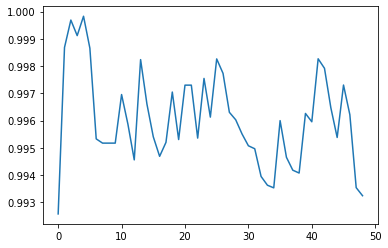

In [109]:
plt.plot(best_in_gen)

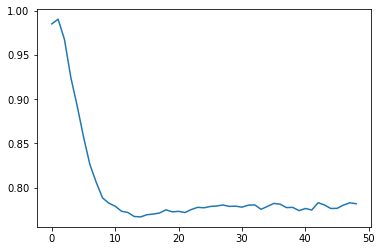

In [116]:
fit_per_run = np.array(fitness_per_run)
plt.plot(np.sum(fit_per_run, axis=0)/10)

# Things to improve

- Elitism!
- Try other mutation and crossover
- Set crossover as probabilistic
- Other strategies for selection and generation update
- run multiple times and get avg results